In [52]:
import os
import shutil
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

In [53]:
#DF, NGRIP, WDC, GRIP

# --- Configuration ---
source_dir = Path("/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025")
destination_dir = Path('/Users/quinnmackay/Desktop/all_horizons')
type='ice_age_intervals'
core='WDC'

In [54]:
# Ensure destination exists
destination_dir.mkdir(parents=True, exist_ok=True)

# Walk through all files recursively
for path in source_dir.rglob(f"{type}.txt"):
    # Create a unique destination filename if there's a conflict
    parent_name = path.parent.name
    dest_file = destination_dir / f"{parent_name}_{path.name}"

    # Copy file
    shutil.copy2(path, dest_file)
    print(f"Copied: {path} -> {dest_file}")

print(f"✅ Done! All {type}.txt files have been copied.")





# --- Load all copied files into pandas DataFrames ---
horizons_dataframes = {}

for file in destination_dir.glob(f"*{type}.txt"):
    # Use the prefix (parent name) as the key
    key = file.name.replace(f"_{type}.txt", "")
    try:
        df = pd.read_csv(file, delim_whitespace=True, comment='#')
        horizons_dataframes[key] = df
        print(f"Loaded {file.name} ({len(df)} rows)")
    except Exception as e:
        print(f"⚠️ Could not read {file.name}: {e}")

print("\n✅ All readable ice age horizon files loaded into 'horizons_dataframes' dict.")


Copied: /Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/DF/ice_age_intervals.txt -> /Users/quinnmackay/Desktop/all_horizons/DF_ice_age_intervals.txt
Copied: /Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/NGRIP/ice_age_intervals.txt -> /Users/quinnmackay/Desktop/all_horizons/NGRIP_ice_age_intervals.txt
Copied: /Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/WDC/ice_age_intervals.txt -> /Users/quinnmackay/Desktop/all_horizons/WDC_ice_age_intervals.txt
Copied: /Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/GRIP/ice_age_intervals.txt -> /Users/quinnmackay/Desktop/all_horizons/GRIP_ice_age_intervals.txt
✅ Done! All ice_age_intervals.txt files have been copied.
Loaded NGRIP_ice_age_intervals.txt (569 rows)
Loaded GRIP_ice_age_intervals.txt (78 rows)
Loaded DF_ice_age_intervals.txt (540

/var/folders/cd/1mh45k3j19g5g_kxkz_17xvc0000gn/T/ipykernel_65862/3491045029.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, comment='#')
/var/folders/cd/1mh45k3j19g5g_kxkz_17xvc0000gn/T/ipykernel_65862/3491045029.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, comment='#')
/var/folders/cd/1mh45k3j19g5g_kxkz_17xvc0000gn/T/ipykernel_65862/3491045029.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, comment='#')
/var/folders/cd/1mh45k3j19g5g_kxkz_17xvc0000gn/T/ipykernel_65862/3491045029.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_cs

In [55]:
#load age profile

param_dir = f'/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/{core}'
thinning_file = os.path.join(param_dir, 'thinning.txt')
deposition_file = os.path.join(param_dir, 'deposition.txt')
density_file = os.path.join(param_dir, 'density.txt')

thinning = pd.read_csv(thinning_file, delim_whitespace=True, comment='#')
deposition = pd.read_csv(deposition_file, delim_whitespace=True, comment='#')
density = pd.read_csv(density_file, delim_whitespace=True, comment='#')

#everything on thinning age
depth = thinning['depth']
thinning_adj = thinning['thinning']
deporate_adj = np.interp(thinning['depth'], deposition['depth'], deposition['deporate'])
density_adj = np.interp(thinning['depth'], density['depth'], density['rel_dens'])

###############

/var/folders/cd/1mh45k3j19g5g_kxkz_17xvc0000gn/T/ipykernel_65862/167800110.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  thinning = pd.read_csv(thinning_file, delim_whitespace=True, comment='#')
/var/folders/cd/1mh45k3j19g5g_kxkz_17xvc0000gn/T/ipykernel_65862/167800110.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  deposition = pd.read_csv(deposition_file, delim_whitespace=True, comment='#')
/var/folders/cd/1mh45k3j19g5g_kxkz_17xvc0000gn/T/ipykernel_65862/167800110.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  density = pd.read_csv(density_file, delim_whitespace=True, comment='#')


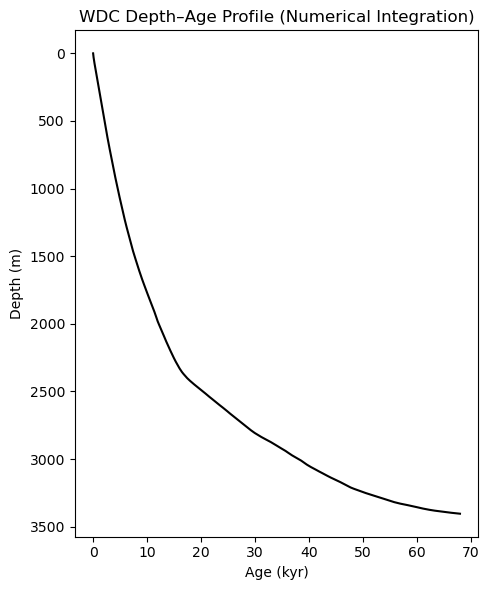

In [56]:
# Assuming these are already defined from your files:
# depth, thinning_adj, deporate_adj, density_adj

# Prepare an empty array for age accumulation
age = np.zeros(len(depth))

def age_integrand(z, density, accumulation, thinning):
    # Simple integrand from your example: density / (accumulation * thinning)
    return density / (accumulation * thinning)

# Numerical integration over each depth interval
for i in range(1, len(depth)):
    # Parameters at upper and lower depth bounds for interpolation in quad:
    dens0 = density_adj[i-1]
    dens1 = density_adj[i]
    dep0 = deporate_adj[i-1]
    dep1 = deporate_adj[i]
    thin0 = thinning_adj[i-1]
    thin1 = thinning_adj[i]

    # Define a linear interpolator for each parameter inside the depth interval
    def dens_interp(z):
        return dens0 + (dens1 - dens0) * (z - depth[i-1]) / (depth[i] - depth[i-1])
    def dep_interp(z):
        return dep0 + (dep1 - dep0) * (z - depth[i-1]) / (depth[i] - depth[i-1])
    def thin_interp(z):
        return thin0 + (thin1 - thin0) * (z - depth[i-1]) / (depth[i] - depth[i-1])

    # Define integrand using these interpolations
    def integrand(z):
        return dens_interp(z) / (dep_interp(z) * thin_interp(z))

    # Integrate over this depth interval
    integral, _ = quad(integrand, depth[i-1], depth[i])
    age[i] = age[i-1] + integral

# --- Combine into DataFrame for output or plotting ---
age_profile = pd.DataFrame({
    'depth_m': depth,
    'age_yr': age,
    'thinning': thinning_adj,
    'deporate': deporate_adj,
    'density_rel': density_adj
})

# --- Plot depth–age profile ---
plt.figure(figsize=(5, 6))
plt.plot(age / 1e3, depth, color='black')

plt.gca().invert_yaxis()
plt.xlabel('Age (kyr)')
plt.ylabel('Depth (m)')
plt.title(f'{core} Depth–Age Profile (Numerical Integration)')
plt.tight_layout()
plt.show()


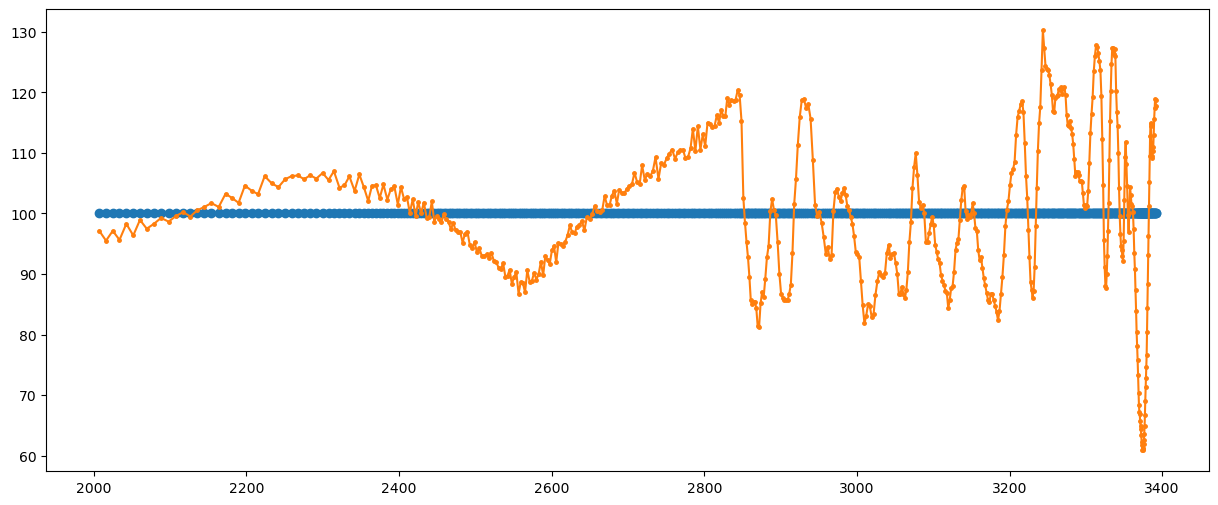

In [57]:
if core in horizons_dataframes:
    df = horizons_dataframes[core]
    if 'depth_top' in df.columns and 'depth_bot' in df.columns and 'duration' in df.columns:
        df['model_dur'] = np.nan
        for index, row in df.iterrows():
            age_output_top = np.interp(row['depth_top'], depth, age)
            age_output_bottom = np.interp(row['depth_bot'], depth, age)
            output = np.round(age_output_bottom-age_output_top,3)
            df.at[index, 'model_dur'] = output

plt.figure(figsize=(15, 6))
plt.plot(df['depth_top'], df['duration'], 'o', linestyle='-', label='Input Duration')
plt.plot(df['depth_top'], df['model_dur'], 'o', linestyle='-', ms=2.5, label='Model Duration')